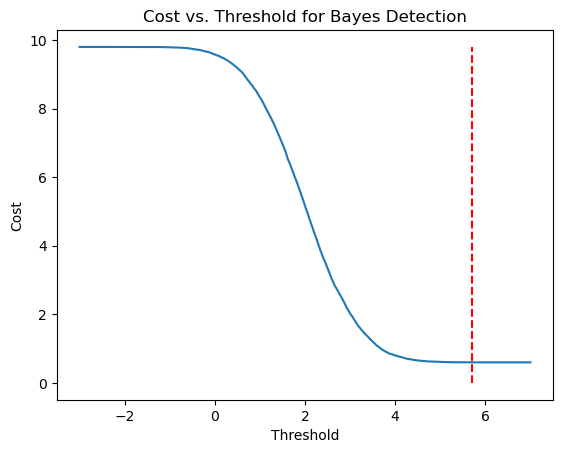

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# 真实状态，0表示无目标，1表示有目标
state = np.random.binomial(1, 0.6, 10000)

# 传感器测量值的概率分布
p_X_H0 = np.random.normal(0, 1, 10000)
p_X_H1 = np.random.normal(2, 1, 10000)

# 先验概率
P_H0 = 0.6
P_H1 = 0.4

# 代价矩阵
C = np.array([[0, 1], [10, 0]])

# 计算检测代价
def calc_cost(tau):
    # 计算检测概率和误警概率
    P_D = np.sum(p_X_H1 > tau) / np.sum(state == 1)
    P_FA = np.sum(p_X_H1 > tau) / np.sum(state == 0)

    # 计算期望代价
    cost_H0 = P_H0 * C[0, 0] + P_H1 * C[1, 0] * P_FA
    cost_H1 = P_H0 * C[0, 1] * (1 - P_D) + P_H1 * C[1, 1] * P_D
    cost = cost_H0 + cost_H1
    return cost

# 计算代价随阈值变化的曲线
tau_range = np.linspace(-3, 7, 5000)
cost_range = np.array([calc_cost(tau) for tau in tau_range])

# 找到最小值所对应的阈值
best_tau = tau_range[np.argmin(cost_range)]

# 画出曲线
plt.plot(tau_range, cost_range)
plt.plot([best_tau, best_tau], [0, np.max(cost_range)], 'r--')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Cost vs. Threshold for Bayes Detection')
plt.show()


In [60]:
C

array([[0, 1],
       [5, 0]])

In [128]:
np.random.randn(10, 1) + 2

array([[3.60063441],
       [2.17970746],
       [2.8972503 ],
       [0.11593542],
       [3.00894433],
       [3.61312516],
       [1.55437393],
       [1.75337743],
       [2.11130391],
       [1.63296604]])

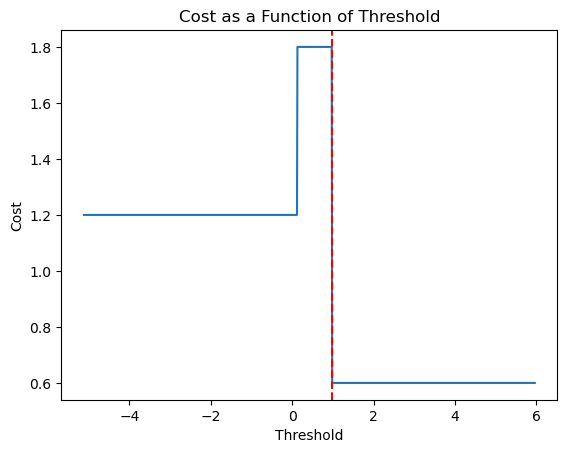

Best threshold: 0.98
P_D: 0.52
P_FA: 0.80
Minimum cost: 1.10


In [165]:
import numpy as np
import matplotlib.pyplot as plt

# 系统参数
P_H0 = 0.6 # 无目标概率
P_H1 = 0.4 # 有目标概率
C_FA = 1 # 虚警代价
C_M = 3 # 漏判代价

# 生成观测数据
N = 50 # 传感器数量
Z_H0 = np.random.randn(N, 1) # 无目标下的观测
Z_H1 = np.random.randn(N, 1) + 1 # 有目标下的观测

# 计算检测统计量的分布参数
mu_H0 = np.mean(Z_H0)
mu_H1 = np.mean(Z_H1)
sigma_H0 = np.std(Z_H0)
sigma_H1 = np.std(Z_H1)

# 计算P_D和P_FA的范围
tau_min = mu_H0 - 5 * sigma_H0 # 最小阈值
tau_max = mu_H1 + 5 * sigma_H1 # 最大阈值
tau_range = np.linspace(tau_min, tau_max, num=1000) # 阈值范围

# 计算代价函数
cost = C_FA * P_H0 * (tau_range > mu_H0).astype(int) + C_M * P_H1 * (tau_range < mu_H1).astype(int)

# 找到最小代价对应的阈值
min_cost_idx = np.argmin(cost)
best_tau = tau_range[min_cost_idx]

# 绘制代价函数随阈值变化的图像
plt.plot(tau_range, cost)
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Cost as a Function of Threshold')
plt.axvline(x=best_tau, color='r', linestyle='--')
plt.show()

# 计算P_D和P_FA
P_D = 1 - np.sum(Z_H1 > best_tau) / N
P_FA = 1 - np.sum(Z_H0 > best_tau) / N

# 计算最小代价
risk = C_FA * P_FA * P_H0 + C_M * P_D * P_H1
print("Best threshold: {:.2f}".format(best_tau))
print("P_D: {:.2f}".format(P_D))
print("P_FA: {:.2f}".format(P_FA))
print("Minimum cost: {:.2f}".format(risk))
